# CEFET-RJ - UNED Nova Iguaçu  <IMG STYLE="position:absolute; TOP:25px; LEFT:500px; WIDTH:63px; HEIGHT:48px" SRC="logocefet.jpg">

## Dep. Engenharia de Controle e Automação

### Disciplina: Processamento Digital de Imagens

Professor: Gabriel Matos Araujo
<br>
Material de Aula (Conversão em Python)
<br>
Script escrito por Leonardo Martins Reigoto

<b> Original File Heading</b>
<br>
EE368/CS232 Digital Image Processing
<br>
Bernd Girod
<br>
Department of Electrical Engineering, Stanford University 
<br>
Script by Qiyuan Tian and David Chen
<br>
Luminosity function


Colour Matching Function : lin2012xyz2e_1_7sf.csv
<br>
"2-deg XYZ CMFs transformed from the CIE (2006) 2-deg LMS cone fundamentals"
<br>
Reference : http://cvrl.ioo.ucl.ac.uk/cmfs.htm



Loading modules and defining inpolygon function

In [1]:
import csv
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import path

def inpolygon(xq, yq, xv, yv):
    shape = xq.shape
    xq = xq.reshape(1,-1)
    yq = yq.reshape(1,-1)
    xv = xv.reshape(1,-1)
    yv = yv.reshape(1,-1)
    q = [(xq[0,i-1], yq[0,i-1]) for i in range(xq.shape[1]+xq.shape[0]-1)]
    p = path.Path([(xv[0,i], yv[0,i]) for i in range(xv.shape[1]+xv.shape[0]-1)])
    return p.contains_points(q).reshape(shape)

Reading csv file

In [2]:
with open('lin2012xyz2e_1_7sf.csv') as csvfile:
    readfile=csv.reader(csvfile,quoting=csv.QUOTE_NONNUMERIC)
    X=[]
    Y=[]
    Z=[]
    for row in readfile:
        X.append(row[1])
        Y.append(row[2])
        Z.append(row[3])

Plotting visible region

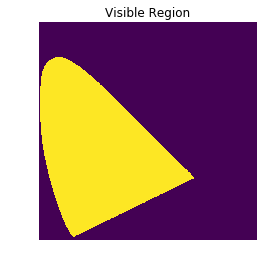

In [3]:
h=np.add(X,Y)
sum_XYZ=np.add(h,Z)
x=np.divide(X,sum_XYZ)
y=np.divide(Y,sum_XYZ)
z=np.divide(Z,sum_XYZ)
resolution = 1000
x = np.multiply(x,resolution) 
y = np.multiply(y,resolution) 
z = np.multiply(z,resolution) 
aux=np.linspace(1, resolution, num=resolution)
xIndex = np.tile(aux,(resolution,1))
yIndex=np.transpose(xIndex)
IN=inpolygon(xIndex, yIndex, x, y)
plt.axis("off")
plt.imshow(IN)
plt.gca().invert_yaxis();
plt.title('Visible Region');



from original file:
<br>
Convert from xyz to RGBxyz to RGB
<br>
Reference: http://www.brucelindbloom.com/index.html?ChromaticityGamuts.html



In [5]:
xImg=np.divide(np.multiply(xIndex,IN),1000)
yImg=np.divide(np.multiply(yIndex,IN),1000)
zImg=np.divide(np.multiply((resolution-xIndex-yIndex),IN),1000)
sigma = 0.0001
xr = 0.735
yr = 0.265
xg = sigma
yg = 1
xb = sigma
yb = -0.074
Xr = xr / yr
Yr = 1
Zr = (1 - xr - yr) / yr

Xg = xg / yg
Yg = 1
Zg = (1 - xg - yg) / yg

Xb = xb / yb
Yb = 1
Zb = (1 - xb - yb) / yb